In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt



In [54]:
## 2. MAke a dataFrame and get x and y values
data = {'Year': list(range(2000,2010)),
        'Sales': [1000, 1200, 1300, 1500, 1700, 2000, 2200, 2500, 2800, 3000]}

df = pd.DataFrame(data)
x=df['Year'].values.reshape(-1,1)
y=df['Sales']

In [55]:
##3. Train_test_split datasets
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
## 3. Make a polynomial MOdel
#a. create polynomial feature

poly=PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

In [57]:
model= LinearRegression()
model.fit(x_train_poly,y_train)

LinearRegression()

In [58]:
x_test_poly=poly.transform(x_test)
y_predic=model.predict(x_test_poly)

In [103]:
print("MEAN SQUARRED ERROR =" ,mean_squared_error(y_test, y_predic))
print("Mean Absolute error=", mean_absolute_error(y_test, y_predic))
print("R2_score=", r2_score(y_test,y_predic))

future_years=[[2015],[2018]]
future_years

future_poly_years=poly.transform(future_years)
future_sales_predic=model.predict(future_poly_years)
future_sales_predic.reshape(-1,1)
print(future_sales_predic, future_years)


MEAN SQUARRED ERROR = 3740.894906884878
Mean Absolute error= 61.06557377241552
R2_score= 0.9941548517079923
[5091.70435256 6335.11871088] [[2015], [2018]]


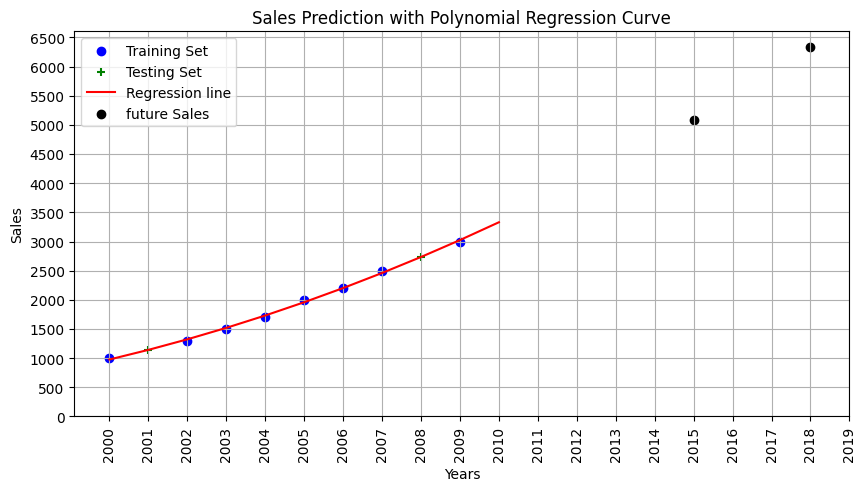

In [116]:
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, color='blue', label='Training Set')
plt.scatter(x_test, y_predic, color='green', marker='+', label='Testing Set')

#Plot polynomial Regression Curve
years_range=np.arange(2000,2011,1).reshape(-1,1)
years_range_poly =poly.fit_transform(years_range)
plt.plot(years_range,model.predict(years_range_poly), color='red', label='Regression line')
plt.scatter([2015,2018], model.predict(future_poly_years).reshape(-1,1), marker='o', color='black', label='future Sales')
plt.xticks(np.arange(2000, 2020, 1))
plt.yticks(np.arange(0,7000,500))
plt.tick_params(axis='y', labelsize=10)
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales Prediction with Polynomial Regression Curve')
plt.show()



